In [46]:
import pandas 
orders = pandas.read_csv('orders.csv')
products = pandas.read_csv('products.csv')
customers = pandas.read_csv('customers.csv')
print("orders:",orders.head(),orders.shape,sep="\n")
print("products:",products.head(),products.shape,sep="\n")
print("customers:",customers.head(),customers.shape,sep="\n")

orders:
          OrderID   OrderDate CustomerID        ProductID    Sales  Quantity  \
0  CA-2019-103800  2019-01-03   DP-13000  OFF-PA-10000174   16.448         2   
1  CA-2019-112326  2019-01-04   PO-19195  OFF-LA-10003223   11.784         3   
2  CA-2019-112326  2019-01-04   PO-19195  OFF-ST-10002743  272.736         3   
3  CA-2019-112326  2019-01-04   PO-19195  OFF-BI-10004094    3.540         2   
4  CA-2019-141817  2019-01-05   MB-18085  OFF-AR-10003478   19.536         3   

   Discount   Profit  
0       0.2   5.5512  
1       0.2   4.2717  
2       0.2 -64.7748  
3       0.8  -5.4870  
4       0.2   4.8840  
(9994, 8)
products:
         ProductID         Category SubCategory  \
0  OFF-PA-10000174  Office Supplies       Paper   
1  OFF-LA-10003223  Office Supplies      Labels   
2  OFF-ST-10002743  Office Supplies     Storage   
3  OFF-BI-10004094  Office Supplies     Binders   
4  OFF-AR-10003478  Office Supplies         Art   

                                         Produ

In [47]:
orders_products = orders.merge(products, on='ProductID')
df_master = orders_products.merge(customers, on='CustomerID')
df_master.shape


(9994, 16)

In [48]:
df_master["UnitPrice"] = df_master["Sales"] / df_master["Quantity"]
df_master.head()

,OrderID,OrderDate,CustomerID,ProductID,Sales,Quantity,Discount,Profit,Category,SubCategory,ProductName,CustomerName,Segment,Region,State,City,UnitPrice
0,CA-2019-103800,2019-01-03,DP-13000,OFF-PA-10000174,16.448,2,0.2,5.5512,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Darren Powers,Consumer,Central,Texas,Houston,8.224
1,CA-2019-112326,2019-01-04,PO-19195,OFF-LA-10003223,11.784,3,0.2,4.2717,Office Supplies,Labels,Avery 508,Phillina Ober,Home Office,Central,Illinois,Naperville,3.928
2,CA-2019-112326,2019-01-04,PO-19195,OFF-ST-10002743,272.736,3,0.2,-64.7748,Office Supplies,Storage,SAFCO Boltless Steel Shelving,Phillina Ober,Home Office,Central,Illinois,Naperville,90.912
3,CA-2019-112326,2019-01-04,PO-19195,OFF-BI-10004094,3.540,2,0.8,-5.4870,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,Phillina Ober,Home Office,Central,Illinois,Naperville,1.770
4,CA-2019-141817,2019-01-05,MB-18085,OFF-AR-10003478,19.536,3,0.2,4.8840,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,Mick Brown,Consumer,East,Pennsylvania,Philadelphia,6.512


In [49]:
df_master['Margin'] = df_master['Profit'] / df_master['Sales']
df_master.head()

,OrderID,OrderDate,CustomerID,ProductID,Sales,Quantity,Discount,Profit,Category,SubCategory,ProductName,CustomerName,Segment,Region,State,City,UnitPrice,Margin
0,CA-2019-103800,2019-01-03,DP-13000,OFF-PA-10000174,16.448,2,0.2,5.5512,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Darren Powers,Consumer,Central,Texas,Houston,8.224,0.3375
1,CA-2019-112326,2019-01-04,PO-19195,OFF-LA-10003223,11.784,3,0.2,4.2717,Office Supplies,Labels,Avery 508,Phillina Ober,Home Office,Central,Illinois,Naperville,3.928,0.3625
2,CA-2019-112326,2019-01-04,PO-19195,OFF-ST-10002743,272.736,3,0.2,-64.7748,Office Supplies,Storage,SAFCO Boltless Steel Shelving,Phillina Ober,Home Office,Central,Illinois,Naperville,90.912,-0.2375
3,CA-2019-112326,2019-01-04,PO-19195,OFF-BI-10004094,3.540,2,0.8,-5.4870,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,Phillina Ober,Home Office,Central,Illinois,Naperville,1.770,-1.5500
4,CA-2019-141817,2019-01-05,MB-18085,OFF-AR-10003478,19.536,3,0.2,4.8840,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,Mick Brown,Consumer,East,Pennsylvania,Philadelphia,6.512,0.2500


In [50]:
df_master['OrderDate'] = pandas.to_datetime(df_master['OrderDate'])
df_master = df_master.set_index('OrderDate')
df_master.head()

,OrderID,CustomerID,ProductID,Sales,Quantity,Discount,Profit,Category,SubCategory,ProductName,CustomerName,Segment,Region,State,City,UnitPrice,Margin
OrderDate,,,,,,,,,,,,,,,,,
2019-01-03,CA-2019-103800,DP-13000,OFF-PA-10000174,16.448,2,0.2,5.5512,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Darren Powers,Consumer,Central,Texas,Houston,8.224,0.3375
2019-01-04,CA-2019-112326,PO-19195,OFF-LA-10003223,11.784,3,0.2,4.2717,Office Supplies,Labels,Avery 508,Phillina Ober,Home Office,Central,Illinois,Naperville,3.928,0.3625
2019-01-04,CA-2019-112326,PO-19195,OFF-ST-10002743,272.736,3,0.2,-64.7748,Office Supplies,Storage,SAFCO Boltless Steel Shelving,Phillina Ober,Home Office,Central,Illinois,Naperville,90.912,-0.2375
2019-01-04,CA-2019-112326,PO-19195,OFF-BI-10004094,3.540,2,0.8,-5.4870,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,Phillina Ober,Home Office,Central,Illinois,Naperville,1.770,-1.5500
2019-01-05,CA-2019-141817,MB-18085,OFF-AR-10003478,19.536,3,0.2,4.8840,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,Mick Brown,Consumer,East,Pennsylvania,Philadelphia,6.512,0.2500


In [51]:
df_monthly = df_master.resample('ME').agg({'Sales': 'sum', 'Profit': 'sum'})
df_monthly.head()

,Sales,Profit
OrderDate,,
2019-01-31,14236.895,2450.1907
2019-02-28,4519.892,862.3084
2019-03-31,55691.009,498.7299
2019-04-30,28295.345,3488.8352
2019-05-31,23648.287,2738.7096


In [52]:
best_month = df_monthly['Sales'].idxmax()
print("Best month for sales:", best_month)

Best month for sales: 2022-11-30 00:00:00


In [53]:
pivot_profit = df_master.pivot_table(index='Segment', columns='Category', values='Profit', aggfunc='sum')
best_tech_segment = pivot_profit['Technology'].idxmax()
print("Best segment for Technology:", best_tech_segment)

Best segment for Technology: Consumer


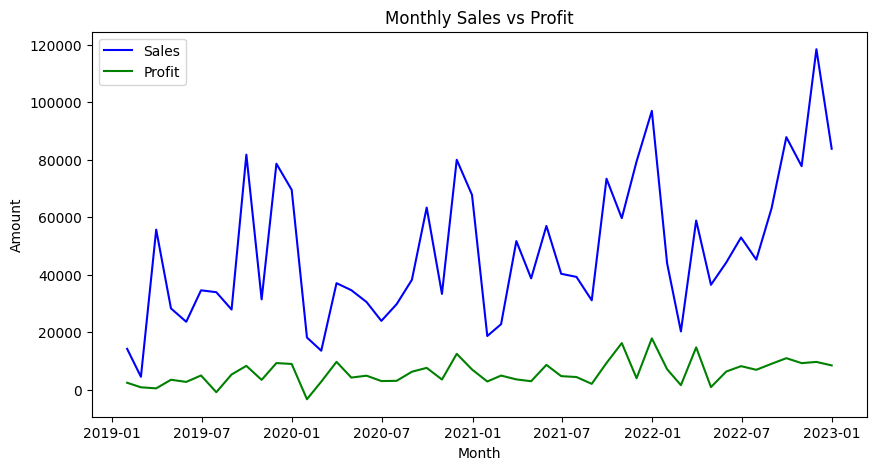

In [54]:
import matplotlib.pyplot as plt

df_monthly = df_master.resample('ME').agg({'Sales':'sum', 'Profit':'sum'})

plt.figure(figsize=(10,5))

plt.plot(df_monthly.index, df_monthly['Sales'], label='Sales', color='blue')
plt.plot(df_monthly.index, df_monthly['Profit'], label='Profit', color='green')

plt.title("Monthly Sales vs Profit")
plt.xlabel("Month")
plt.ylabel("Amount")
plt.legend()

plt.show()


there are some months that sales and profit doesn't move like each other 

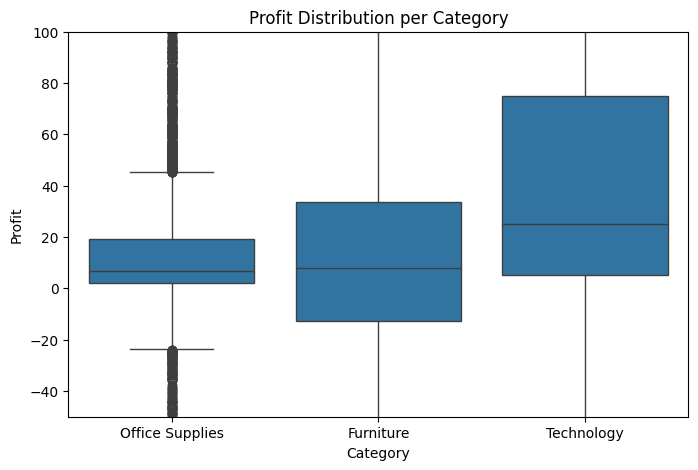

In [55]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.boxplot(data=df_master, x='Category', y='Profit')
plt.ylim(-50, 100) 
plt.title("Profit Distribution per Category")
plt.show()


Office Supplies has the most transactions with negative profit.

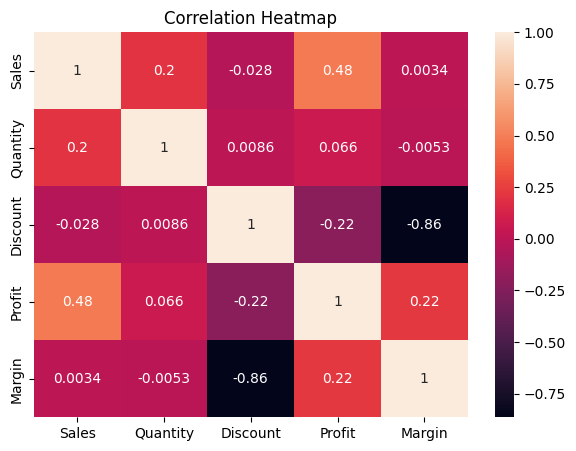

In [56]:
num_cols = ['Sales', 'Quantity', 'Discount', 'Profit', 'Margin']
corr = df_master[num_cols].corr()
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True)
plt.title("Correlation Heatmap")
plt.show()


There is a negative correlation between discount and profit. Increasing discount reduces profit.